In [ ]:
import sympy
import sequences
import igraph
import math
import plotly.graph_objects as go

In [ ]:
g = sympy.Function('G')
c = sympy.Function('C')
q = sympy.Function('Q')
t = sympy.Function('T')
h = sympy.Function('H')
n = sympy.symbols('n')
f = sympy.Function('F')
gol = sequences.Recurrence(g(n-g(n-1)) + 1, g, n)
conn = sequences.Recurrence(c(n-2-c(n-1)) + c(n-3-c(n-2)), c, n)
hofs = sequences.Recurrence(q(n-q(n-1)) + q(n-q(n-2)), q, n)
tanny = sequences.Recurrence(t(n-1-t(n-1))+t(n-2-t(n-2)), t, n)
new = sequences.Recurrence(h(n-1-h(n-2))+h(n-3-h(n-4)), h, n)
neg = sequences.Recurrence(f(n+2-f(n-1))+f(n+1-f(n-2)),f,n)

In [7]:
sequences.seq_terms(sequences.Sequence([1,1,1,2]), conn, 1, 200)

[1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 8, 9, 10, 10, 11, 12, 12, 12, 13, 14, 14, 15, 16, 16, 16, 16, 16, 16, 16, 17, 18, 18, 19, 20, 20, 20, 21, 22, 22, 23, 24, 24, 24, 24, 25, 26, 26, 27, 28, 28, 28, 29, 30, 30, 31, 32, 32, 32, 32, 32, 32, 32, 32, 33, 34, 34, 35, 36, 36, 36, 37, 38, 38, 39, 40, 40, 40, 40, 41, 42, 42, 43, 44, 44, 44, 45, 46, 46, 47, 48, 48, 48, 48, 48, 49, 50, 50, 51, 52, 52, 52, 53, 54, 54, 55, 56, 56, 56, 56, 57, 58, 58, 59, 60, 60, 60, 61, 62, 62, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 66, 66, 67, 68, 68, 68, 69, 70, 70, 71, 72, 72, 72, 72, 73, 74, 74, 75, 76, 76, 76, 77, 78, 78, 79, 80, 80, 80, 80, 80, 81, 82, 82, 83, 84, 84, 84, 85, 86, 86, 87, 88, 88, 88, 88, 89, 90, 90, 91, 92, 92, 92, 93, 94, 94, 95, 96]

In [ ]:
sequences.seq_terms(sequences.Sequence([1,1]), gol, 1, 101)

In [ ]:
sequences.seq_terms(sequences.Sequence([4,5,6,6,7]),neg,1,101)

In [ ]:
sequences.seq_terms(sequences.Sequence([10,10,11,12,12,12,13,14,14,15,16,17,18,18,19]),neg,1,101)

In [ ]:
# used to keep track of the value of the nodes during traversed and the tree's leaves 
global num
global leaves

class Node:
# creates a node with a specific value (stored as a list), children (stored as a list), and a height
# self.supernode keeps track of if a specific node is a supernode or not 
    def __init__(self,height = 0, supernode = True):
        self.value = []
        self.children = []
        self.height = height
        self.supernode = supernode
        
# creates a tree skeleton using the node it is called upon as the root 
# num_children determines how many children each node has 
    def make_skeleton(self, num_children):
        # as long as the height of the node is greater than 0, this will add n children to self.children 
        # if the node is a supernode, that node's left child is also a supernode 
        for i in range(0,num_children):
            if self.supernode==True and i == 0 and self.height > 0:
                self.children.append(Node(height = self.height - 1, supernode=True))
            elif self.height > 0:
                self.children.append(Node(height = self.height - 1, supernode = False))
        # calls the same function on the node's children, as long as their height is >0 
        for child in self.children:
            if child.height > 0:
                child.make_skeleton(num_children)
    
    # resets num, and then calls a function which labels the skeleton 
    # each of the parameters detemines the number of values in supernodes, non-supernodes, and leaves 
    def label_skeleton(self,supernode_values=1,nonsupernode_values=1,leave_values=1):
        global num 
        num = 1
        Node.call_label_skeleton(self,supernode_values,nonsupernode_values,leave_values)
        
    # traverses the tree and labels each node 
    def call_label_skeleton(self,supernode_values,nonsupernode_values,leave_values):
        global num
        # if the node is a supernode with height > 0, calls the function on the left child, labels itself, 
        # and then calls the function on its other children 
        if self.supernode==True and self.height >0:
            Node.call_label_skeleton(self.children[0],supernode_values,nonsupernode_values,leave_values)
            for i in range(0,supernode_values):
                self.value.append(num)
                num+= 1
            for child in self.children[1:]:
                Node.call_label_skeleton(child,supernode_values,nonsupernode_values,leave_values)
        # if the node has height > 0 is not a supernode, labels itself and the calls upon its children
        elif self.height > 0 and self.supernode == False:
            for i in range(0,nonsupernode_values):
                self.value.append(num)
                num+=1
            for child in self.children:
                Node.call_label_skeleton(child,supernode_values,nonsupernode_values,leave_values)
        else:
        # if height == 0, the node labels itself 
            for i in range(0, leave_values):
                self.value.append(num)
                num+=1
    
    # resets num, and then calls a function which labels the tree using negative supernodes 
    # num_negatives determines the number of labels in each supernode 
    def neg_labels(self,num_negatives):
        global num
        num = 1
        Node.call_neg_labels(self, num_negatives)
    
    # traverses the tree and labels each node. supernodes "undo" the previous n labels determined by num_negatives
    def call_neg_labels(self, num_negatives):
        global num
        #if a node is a supernode and height >0, calls the function on its left child
        #then undos the previous n labels (these become that nodes labels) and calls the function on other children
        if self.supernode==True and self.height>0:
            Node.call_neg_labels(self.children[0],num_negatives)
            num -=1
            self.value.append(num)
            for i in range(0,num_negatives-1):
                num -=1
                self.value.append(num)
            for child in self.children[1:]:
                Node.call_neg_labels(child,num_negatives)
        # the rest of the function proceeds the same as the label_skeleton function
        elif self.height > 0 and self.supernode == False:
            self.value.append(num)
            num+=1
            for child in self.children:
                Node.call_neg_labels(child,num_negatives)
        else:
                self.value.append(num)
                num+=1        
            
    # this function prints the labels of each node in the lable they would be traversed#
    # mostly used for debugging purposes #
    def print_tree(self):
        if self.height > 0 and self.supernode==True:
            self.children[0].print_tree()
            print(str(self.value),end='')
            for child in self.children[1:]:
                child.print_tree()
        elif self.height > 0 and self.supernode == False:
            print(str(self.value), end = '')
            for child in self.children:
                child.print_tree()
        else:
            print(str(self.value),end= '' )
        return ''
    
    def return_heights_values(self,heights=[],values=[],supernodes=[]):
        cur_heights = heights
        cur_values = values
        cur_supernodes = supernodes
        if self.height >0 and self.supernode ==True:
            self.children[0].return_heights_values(heights=cur_heights,values=cur_values,supernodes=cur_supernodes)
            cur_heights.append(self.height)
            cur_values.append(str(self.value)[1:-1])
            cur_supernodes.append(True)
            for child in self.children[1:]:
                child.return_heights_values(heights=cur_heights,values=cur_values,supernodes=cur_supernodes)
        elif self.height > 0 and self.supernode == False:
            cur_heights.append(self.height)
            cur_values.append(str(self.value)[1:-1])
            cur_supernodes.append(False)
            for child in self.children:
                child.return_heights_values(heights=cur_heights,values=cur_values,supernodes=cur_supernodes)
        else:
            cur_heights.append(self.height)
            cur_values.append(str(self.value)[1:-1])
            cur_supernodes.append(False)
        return cur_heights,cur_values,cur_supernodes
            
            
    
    # this is old and only works for positive supernode labels
    def old_find_sequence(self): 
        global leaves
        leaves = 0
        return Node.old_call_find_sequence(self,[])
        
    # this is old and only works for positive supernode labels    
    def old_call_find_sequence(self, list):
        global leaves
        if self.height > 0 and self.supernode==True:
            self.children[0].old_call_find_sequence(list)
            for i in self.value:
                list.append(leaves)
            for child in self.children[1:]:
                child.old_call_find_sequence(list)
        elif self.height > 0 and self.supernode == False:
            for i in self.value:
                list.append(leaves)
            for child in self.children:
                child.old_call_find_sequence(list)
        else:
            leaves += 1
            for i in self.value:
                list.append(leaves)
        return list
    
    # calls upon helper function to create a list of leaves
    # seq is the sequence represented by the tree, place_in_seq is the current position in the sequence
    # leaves_less_than is the number of leaves less than the current position in the sequence
    # new_list_of_leaves helps remove leaves that are less than the current position
    def find_sequence(self):
        list_of_leaves = Node.call_find_sequence(self,[])
        seq = []
        place_in_seq = 0
        leaves_less_than = 0
        new_list_of_leaves = []
    # continues looping through the list of leaves until it is empty
        while len(list_of_leaves) != 0:
            for item in list_of_leaves:
                if item <= place_in_seq + 1:
                    leaves_less_than += 1
                else:
                    new_list_of_leaves.append(item)
            seq.append(leaves_less_than)
            place_in_seq += 1 
            list_of_leaves=new_list_of_leaves
            new_list_of_leaves=[]
        return seq
                
            
        
    # goes through each node in the tree and creates a list of leaves    
    def call_find_sequence(self,list_of_leaves):
        if self.height>0: 
            for child in self.children:
                child.call_find_sequence(list_of_leaves)
        elif self.height == 0:
            list_of_leaves.append(self.value[0])
        return list_of_leaves
            
                        
## test ##
node1 = Node(height=5)
node1.make_skeleton(3)
node1.neg_labels(1)    
print(node1.find_sequence())

[2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 18, 19, 20, 21, 21, 22, 23, 24, 24, 25, 26, 27, 27, 27, 28, 29, 30, 30, 31, 32, 33, 33, 34, 35, 36, 36, 36, 37, 38, 39, 39, 40, 41, 42, 42, 43, 44, 45, 45, 45, 46, 47, 48, 48, 49, 50, 51, 51, 52, 53, 54, 54, 54, 54, 55, 56, 57, 57, 58, 59, 60, 60, 61, 62, 63, 63, 63, 64, 65, 66, 66, 67, 68, 69, 69, 70, 71, 72, 72, 72, 73, 74, 75, 75, 76, 77, 78, 78, 79, 80, 81, 81, 81, 81, 82, 83, 84, 84, 85, 86, 87, 87, 88, 89, 90, 90, 90, 91, 92, 93, 93, 94, 95, 96, 96, 97, 98, 99, 99, 99, 100, 101, 102, 102, 103, 104, 105, 105, 106, 107, 108, 108, 108, 108, 109, 110, 111, 111, 112, 113, 114, 114, 115, 116, 117, 117, 117, 118, 119, 120, 120, 121, 122, 123, 123, 124, 125, 126, 126, 126, 127, 128, 129, 129, 130, 131, 132, 132, 133, 134, 135, 135, 135, 135, 136, 137, 138, 138, 139, 140, 141, 141, 142, 143, 144, 144, 144, 145, 146, 147, 147, 148, 149, 150, 150, 151, 152, 153, 153, 153, 154, 155, 156, 156, 157, 158, 159, 159, 1

In [18]:
def conn(levels, num_children):
    next_vert  = 1
    root = 0
    tree = igraph.Graph()
    tree.add_vertex(0)
    for i in range(levels):
        tree.add_vertex(next_vert)
        tree.add_edge(root,next_vert)
        next_root = next_vert
        next_vert += 1
        # traverse what we have to make copy #
        visited = {}
        parents = {}
        to_process = [root]
        while len(to_process) > 0:
            cur_vert = to_process[-1]
            to_process = to_process[:-1]
            tree.add_vertex(next_vert)
            visited[cur_vert] = next_vert
            if cur_vert == root:
                tree.add_edge(next_vert,next_root)
            else:
                tree.add_edge(next_vert,parents[cur_vert])
            for v in tree.neighbors(cur_vert):
                if v not in visited and v != next_root:
                    parents[v] = next_vert
                    to_process.append(v)
            next_vert +=1
        root = next_root
    return tree

def get_info(n, neg = True, num_children = 2, supernodes = 1, nonsupernodes = 1, leaves = 1):
    tree = Node(height=n)
    tree.make_skeleton(num_children)
    if neg == True:
        tree.neg_labels(supernodes)
    else:
        tree.label_skeleton(supernodes, nonsupernodes, leaves)
    heights, values, is_supernode = tree.return_heights_values([],[],[])
    return heights, values, is_supernode

def draw_tree(n, neg = True, num_children=2, supernodes = 1, nonsupernodes = 1, leaves = 1): 
    tree = conn(n,num_children)
    heights,values,is_supernode = get_info(n, neg, num_children, supernodes, nonsupernodes, leaves)
    shape_dict = {True: 'rectangle',False: 'circle'}
    tree.vs['label']= values
    #tree.vs['height'] = heights
    tree.vs['is_supernode'] = is_supernode
    tree.vs['shape'] = [shape_dict[is_supernode] for is_supernode in tree.vs['is_supernode']]
    tree_lay = tree.layout('rt', root = 2**n-1)
    return igraph.plot(tree, layout = tree_lay, vertex_color='yellow',vertex_size=30)
        
        
    

In [63]:
def create_conn(s):
    return sequences.Recurrence(c(n-s-c(n-1)) + c(n-s-1-c(n-2))+ c(n-s-2-c(n-3)), c, n)

s=5
seq = create_conn(-s)
node1 = Node(height=6)
node1.make_skeleton(3)
node1.neg_labels(s)    
treeseq = node1.find_sequence()

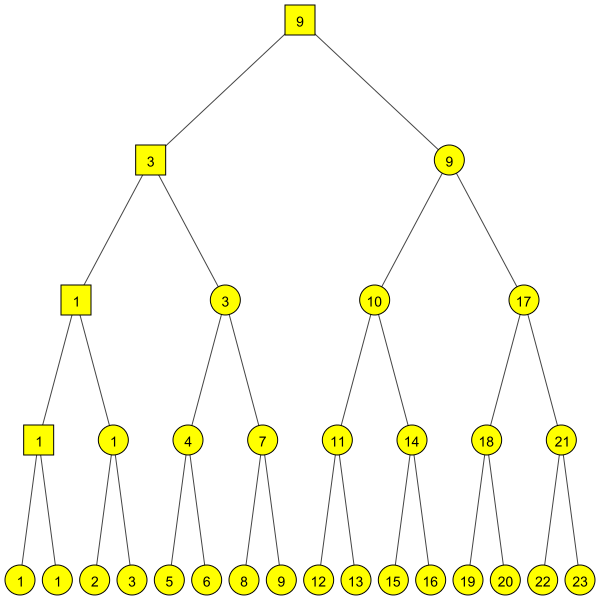

In [19]:
draw_tree(4,num_children=2)